In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.mobilenet import preprocess_input, MobileNet


import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import os
import re
import pandas as pd
import cv2
from tensorflow import keras
import matplotlib.image as mpimg
%matplotlib inline



In [5]:
import get_dataset
import imp 
imp.reload(get_dataset)

with_mask =get_dataset.load("dataset/with_mask")
without_mask = get_dataset.load("dataset/without_mask")

Loaded 2523 images from path dataset/with_mask
Loaded 2194 images from path dataset/without_mask


In [6]:
with_mask = np.array(with_mask)
without_mask = np.array(without_mask)

(50, 50, 3)


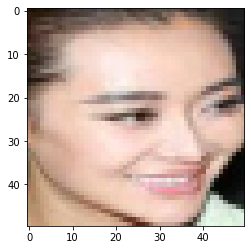

In [7]:
print(without_mask[1].shape)
plt.figure()
plt.imshow(np.squeeze(without_mask[1]))
plt.show()

In [8]:
imagenes = np.concatenate([with_mask, without_mask])

images = np.array(imagenes)
print(images.shape)

(4717, 50, 50, 3)


In [9]:
etiqueta_nomask = np.repeat(0, len(without_mask))
print(len(etiqueta_nomask))

etiqueta_mask = np.repeat(1,len(with_mask))
print(len(etiqueta_mask))

class_names = ["with_mask", "without_mask"]

2194
2523


In [10]:
labels = np.concatenate([etiqueta_nomask, etiqueta_mask])
print (len(labels))

4717


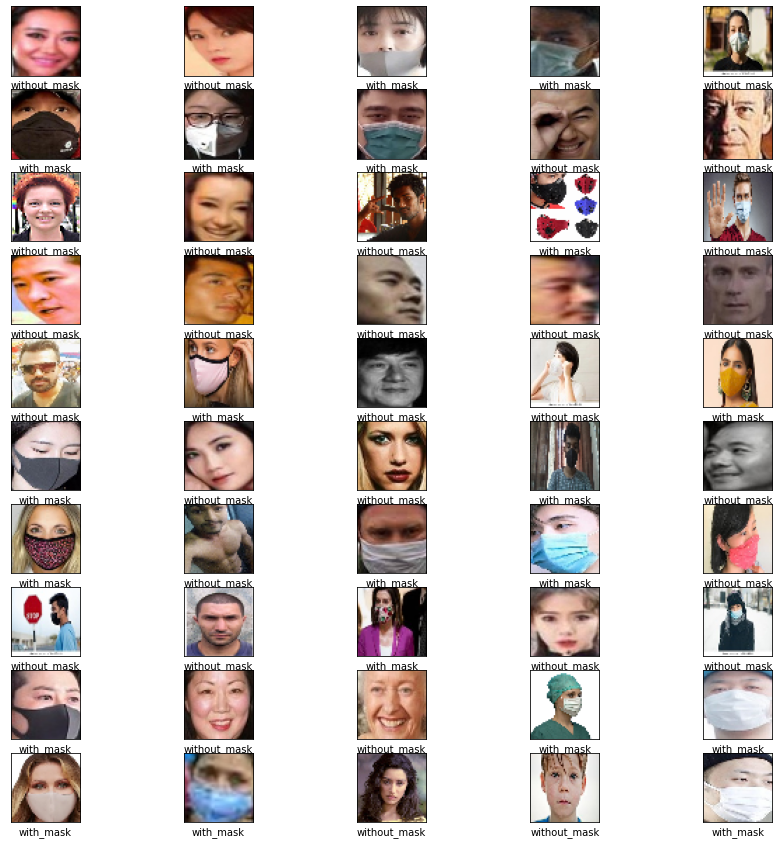

In [11]:
ind = np.random.choice(imagenes.shape[0],50)

plt.figure(figsize=(15,15))
for i, img in enumerate(ind):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes[img], cmap="binary")
    plt.xlabel(class_names[labels[img]])
plt.show()

In [12]:
X_train, X_val, y_train, y_val = train_test_split(imagenes,labels, test_size=0.1)


In [87]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(50, 50,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    ])

In [13]:
base_model = MobileNet(include_top=False, weights='imagenet', pooling='max', input_shape=(50, 50, 3))

for layer in base_model.layers:
    layer.W_regularizer = tf.keras.regularizers.l2(1e-3)
    layer.trainable = True

output = base_model.output
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dropout(0.5)(output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

model = tf.keras.models.Model(base_model.input, output)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
        input_shape=None, alpha=1.0, depth_multiplier=1, dropout=0.001,
        include_top=True, weights='imagenet', input_tensor=None, pooling=None,
        classes=1000, classifier_activation='softmax', **kwargs
    )

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 25, 25, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 25, 25, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 25, 25, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 25, 25, 32)       128       
 ation)                                                    

In [14]:
from tensorflow.keras.callbacks import  EarlyStopping
import datetime 

early_stop = EarlyStopping(patience=30, restore_best_weights=True)

# Define all callbacks in a list
callbacks =[
    early_stop
]

params = {
    "validation_data": (X_val,y_val),
    "epochs": 200, 
    "verbose": 2,
    #"callbacks": callbacks,
    "batch_size":256,
}

In [19]:
model.compile(loss='binary_crossentropy', 
              metrics=['accuracy'], 
              optimizer=tf.keras.optimizers.Adam(lr=1e-4, decay=1e-6))


C:\Users\Santi-PC\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
history = model.fit(X_train,np.array(y_train),**params)

Epoch 1/200
17/17 - 25s - loss: 0.6698 - accuracy: 0.6869 - val_loss: 0.6564 - val_accuracy: 0.5784 - 25s/epoch - 1s/step
Epoch 2/200
17/17 - 22s - loss: 0.2886 - accuracy: 0.8747 - val_loss: 0.6473 - val_accuracy: 0.5699 - 22s/epoch - 1s/step
Epoch 3/200
17/17 - 23s - loss: 0.1882 - accuracy: 0.9180 - val_loss: 0.6411 - val_accuracy: 0.5657 - 23s/epoch - 1s/step
Epoch 4/200
17/17 - 21s - loss: 0.1216 - accuracy: 0.9543 - val_loss: 0.6299 - val_accuracy: 0.5805 - 21s/epoch - 1s/step
Epoch 5/200
17/17 - 21s - loss: 0.0913 - accuracy: 0.9651 - val_loss: 0.6127 - val_accuracy: 0.5890 - 21s/epoch - 1s/step
Epoch 6/200
17/17 - 22s - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.5734 - val_accuracy: 0.6504 - 22s/epoch - 1s/step
Epoch 7/200
17/17 - 22s - loss: 0.0527 - accuracy: 0.9861 - val_loss: 0.5155 - val_accuracy: 0.7458 - 22s/epoch - 1s/step
Epoch 8/200
17/17 - 21s - loss: 0.0478 - accuracy: 0.9866 - val_loss: 0.4609 - val_accuracy: 0.8157 - 21s/epoch - 1s/step
Epoch 9/200
17/17 - 22s 

<AxesSubplot:>

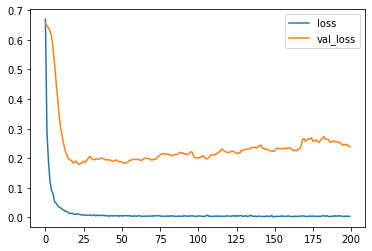

In [21]:
pd.DataFrame(model.history.history)[['loss', 'val_loss']].plot()


<AxesSubplot:>

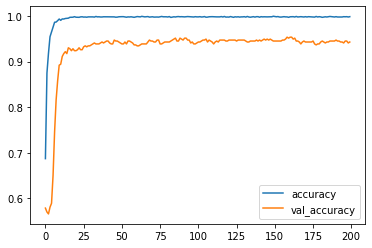

In [22]:
pd.DataFrame(model.history.history)[['accuracy', 'val_accuracy']].plot()


In [23]:
json_model = model.to_json()


In [24]:
with open('masktrain_model.json', 'w') as json_file:
    json_file.write(json_model)

In [25]:
model.save_weights("model_weights.h5")
